# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [18]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip3 install smdebug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.3/83.3 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.1/280.1 kB 6.7 MB/s eta 0:00:00:00:01
  Created wheel for pyinstrument-cext: filename=pyinstrument_cext-0.2.4-cp310-cp310-linux_x86_64.whl size=6295 sha256=621b5bc064fdbe3f4b4d52c343d062a82cc24ffc82d1c9f81a64d58ee561df35
  Stored in directory: /home/ec2-user/.cache/pip/wheels/0f/8b/7a/5f7fd1dd6d3cbb3d350d4c832c5e2f962687749f6d67d573a6
Successfully built pyinstrument-cext
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.4
    Uninstalling protobuf-4.24.4:
      Successfully uninstalled protobuf-4.24.4


In [1]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [3]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2023-12-04 17:39:58--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.220.176, 52.219.194.32, 52.219.120.80, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.220.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

100%[====================================>] 1,132,023,110 41.8MB/s   in 25s    

2023-12-04 17:40:24 (42.8 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg

In [2]:
role = sagemaker.get_execution_role()
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()
print(bucket)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker-us-east-1-760546196925


In [4]:
inputs = sagemaker_session.upload_data(path="dogImages", bucket=bucket, key_prefix='imagesDogClassesSet')

In [4]:
print(inputs)

s3://sagemaker-us-east-1-760546196925/imagesDogClassesSet/


## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [5]:
#TODO: Declare your HP ranges, metrics etc.
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner, IntegerParameter

hyperparameter_ranges = {
    "batch-size": sagemaker.tuner.CategoricalParameter([32, 64, 128, 256, 512]),
    "lr": sagemaker.tuner.ContinuousParameter(0.001, 0.1),
#     'epochs': IntegerParameter(2, 4),
}

objective_metric_name = "Average Test Loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "Average Test Loss", "Regex": "Average Loss: ([0-9\\.]+)"}]

In [6]:
#TODO: Create estimators for your HPs
from sagemaker.pytorch import PyTorch

estimator = PyTorch(
    entry_point="hpo.py",
    base_job_name='Hyperparameter-tuning',    
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.large"
)

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type,
)


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [8]:
import os 

os.environ["SM_CHANNEL_TRAINING"] = "s3://"+ bucket+ "/imagesDogClassesSet/"
os.environ['SM_MODEL_DIR'] = "s3://"+ bucket+ "/model/"

In [13]:
tuner.fit({"training": os.environ["SM_CHANNEL_TRAINING"]}, wait=False)

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


Using provided s3_resource


In [83]:
tuner.best_training_job()

'pytorch-training-231205-1633-001-8788c5f0'

In [84]:
tuner.best_estimator().hyperparameters()


2023-12-05 16:44:04 Starting - Preparing the instances for training
2023-12-05 16:44:04 Downloading - Downloading input data
2023-12-05 16:44:04 Training - Training image download completed. Training in progress.
2023-12-05 16:44:04 Uploading - Uploading generated training model
2023-12-05 16:44:04 Completed - Resource reused by training job: pytorch-training-231205-1633-003-bfcd3599


{'_tuning_objective_metric': '"Test Loss"',
 'batch-size': '"32"',
 'lr': '0.05339048264744404',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2023-12-05-16-33-32-026"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-760546196925/pytorch-training-2023-12-05-16-33-32-026/source/sourcedir.tar.gz"'}

In [ ]:
# TODO: Get the best estimators and the best HPs
best_estimator = tuner.best_estimator()

# Get the hyperparameters of the best trained model
best_estimator.hyperparameters()

In [3]:
best_hyperparameters = {"batch-size": "32", "lr": "0.05339048264744404"}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [4]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import Rule, ProfilerRule, rule_configs, DebuggerHookConfig

rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]

In [5]:
hook_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "100", "eval.save_interval": "10"}
)

In [6]:
# TODO: Create and fit an estimator
from sagemaker.pytorch import PyTorch

estimator = PyTorch(
    entry_point="train_model.py",
    base_job_name="smdebugger-pytorch",
    role=role,
    instance_count=1,
    instance_type="ml.m5.large",
    hyperparameters=best_hyperparameters,
    framework_version="1.8",
    py_version="py36",
    rules=rules,
    debugger_hook_config=hook_config,
)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [10]:
# TODO: Plot a debugging output.
estimator.fit({"training": os.environ["SM_CHANNEL_TRAINING"]}, wait=True)

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.


Using provided s3_resource


INFO:sagemaker:Creating training-job with name: smdebugger-pytorch-2023-12-06-12-56-14-848


2023-12-06 12:56:15 Starting - Starting the training job...
2023-12-06 12:56:44 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
......
2023-12-06 12:57:44 Downloading - Downloading input data............
2023-12-06 12:59:45 Training - Downloading the training image..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-12-06 12:59:51,198 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-12-06 12:59:51,201 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-12-06 12:59:51,210 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-12-06 12:59:51,214 sagemaker_pytorch_container.training INFO     Invoking user training script.
2023-12-06 12:59:51,402 sagemaker-training-tool

In [11]:
job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)

In [12]:
estimator.latest_job_debugger_artifacts_path()

's3://sagemaker-us-east-1-760546196925/smdebugger-pytorch-2023-12-06-12-56-14-848/debug-output'

In [21]:
!pip install --force-reinstall protobuf==3.20.*

  Using cached protobuf-3.20.3-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


In [13]:
import smdebug
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

[2023-12-06 13:34:45.295 ip-172-16-68-151.ec2.internal:3351 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-12-06 13:34:45.322 ip-172-16-68-151.ec2.internal:3351 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-760546196925/smdebugger-pytorch-2023-12-06-12-56-14-848/debug-output


In [14]:
trial.tensor_names()

[2023-12-06 13:34:48.448 ip-172-16-68-151.ec2.internal:3351 INFO trial.py:197] Training has ended, will refresh one final time in 1 sec.
[2023-12-06 13:34:49.471 ip-172-16-68-151.ec2.internal:3351 INFO trial.py:210] Loaded all steps


['CrossEntropyLoss_output_0',
 'gradient/ResNet_fc.0.bias',
 'gradient/ResNet_fc.0.weight',
 'gradient/ResNet_fc.2.bias',
 'gradient/ResNet_fc.2.weight',
 'layer1.0.relu_input_0',
 'layer1.0.relu_input_1',
 'layer1.0.relu_input_2',
 'layer1.1.relu_input_0',
 'layer1.1.relu_input_1',
 'layer1.1.relu_input_2',
 'layer1.2.relu_input_0',
 'layer1.2.relu_input_1',
 'layer1.2.relu_input_2',
 'layer2.0.relu_input_0',
 'layer2.0.relu_input_1',
 'layer2.0.relu_input_2',
 'layer2.1.relu_input_0',
 'layer2.1.relu_input_1',
 'layer2.1.relu_input_2',
 'layer2.2.relu_input_0',
 'layer2.2.relu_input_1',
 'layer2.2.relu_input_2',
 'layer2.3.relu_input_0',
 'layer2.3.relu_input_1',
 'layer2.3.relu_input_2',
 'layer3.0.relu_input_0',
 'layer3.0.relu_input_1',
 'layer3.0.relu_input_2',
 'layer3.1.relu_input_0',
 'layer3.1.relu_input_1',
 'layer3.1.relu_input_2',
 'layer3.2.relu_input_0',
 'layer3.2.relu_input_1',
 'layer3.2.relu_input_2',
 'layer3.3.relu_input_0',
 'layer3.3.relu_input_1',
 'layer3.3.rel

In [15]:
len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN))

3

In [16]:
len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL))

6

In [17]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

INFO:matplotlib.font_manager:generated new fontManager


loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


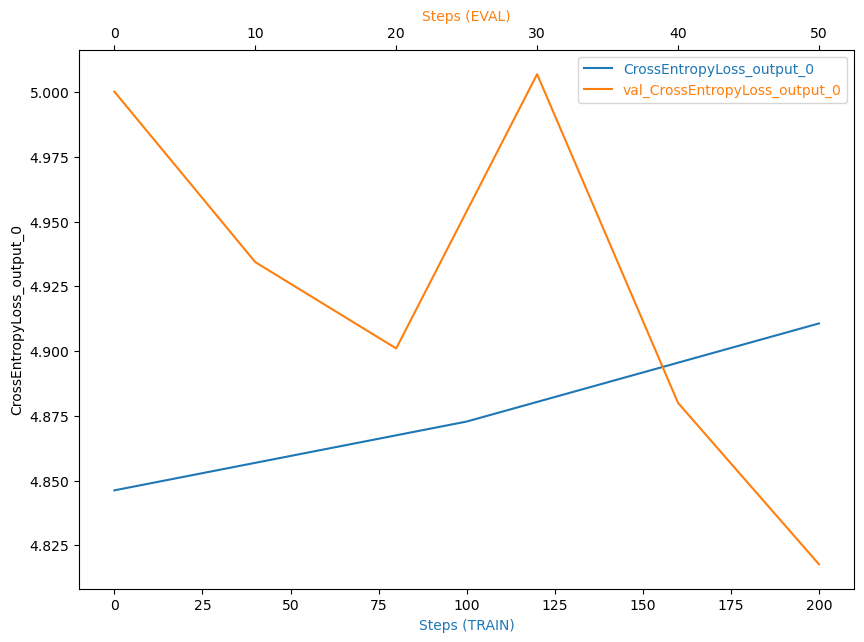

In [19]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [20]:
# TODO: Display the profiler output
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"

In [21]:
! aws s3 ls {rule_output_path} --recursive

2023-12-06 13:30:58     329715 smdebugger-pytorch-2023-12-06-12-56-14-848/rule-output/ProfilerReport/profiler-output/profiler-report.html
2023-12-06 13:30:57     171073 smdebugger-pytorch-2023-12-06-12-56-14-848/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2023-12-06 13:30:53        192 smdebugger-pytorch-2023-12-06-12-56-14-848/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2023-12-06 13:30:53        200 smdebugger-pytorch-2023-12-06-12-56-14-848/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2023-12-06 13:30:53        126 smdebugger-pytorch-2023-12-06-12-56-14-848/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2023-12-06 13:30:53        127 smdebugger-pytorch-2023-12-06-12-56-14-848/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2023-12-06 13:30:53        199 smdebugger-pytorch-2023-12-06-12-56-14-848/rule-output/ProfilerReport/profiler-outp

In [22]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-760546196925/smdebugger-pytorch-2023-12-06-12-56-14-848/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-760546196925/smdebugger-pytorch-2023-12-06-12-56-14-848/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-760546196925/smdebugger-pytorch-2023-12-06-12-56-14-848/rule-output/ProfilerReport/profiler-output/profiler-reports/OverallFrameworkMetrics.json to ProfilerReport/profiler-output/profiler-reports/OverallFrameworkMetrics.json
download: s3://sagemaker-us-east-1-760546196925/smdebugger-pytorch-2023-12-06-12-56-14-848/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-1

In [23]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [24]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [30]:
from sagemaker.predictor import Predictor

jpeg_serializer = sagemaker.serializers.IdentitySerializer("image/jpeg")
json_deserializer = sagemaker.deserializers.JSONDeserializer()

class ImgPredictor(Predictor):
    def __init__( self, endpoint_name, sagemaker_session):
        super(ImgPredictor, self).__init__(
            endpoint_name,
            sagemaker_session = sagemaker_session,
            serializer = jpeg_serializer,
            deserializer = json_deserializer
        )

In [31]:
model_location = estimator.model_data
print(model_location)

s3://sagemaker-us-east-1-760546196925/smdebugger-pytorch-2023-12-06-12-56-14-848/output/model.tar.gz


In [51]:
from sagemaker.pytorch import PyTorchModel

estimator = PyTorchModel(
    model_data=model_location,
    role=role,
    entry_point="infer.py",
    py_version="py36",
    framework_version="1.8",
    predictor_cls=ImgPredictor
)

# TODO: Deploy your model to an endpoint
predictor = estimator.deploy(initial_instance_count=1, instance_type="ml.m5.large")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


INFO:sagemaker:Repacking model artifact (s3://sagemaker-us-east-1-760546196925/smdebugger-pytorch-2023-12-06-12-56-14-848/output/model.tar.gz), script artifact (None), and dependencies ([]) into single tar.gz file located at s3://sagemaker-us-east-1-760546196925/pytorch-inference-2023-12-06-15-17-42-441/model.tar.gz. This may take some time depending on model size...
INFO:sagemaker:Creating model with name: pytorch-inference-2023-12-06-15-17-52-106
INFO:sagemaker:Creating endpoint-config with name pytorch-inference-2023-12-06-15-17-52-838
INFO:sagemaker:Creating endpoint with name pytorch-inference-2023-12-06-15-17-52-838


-----!

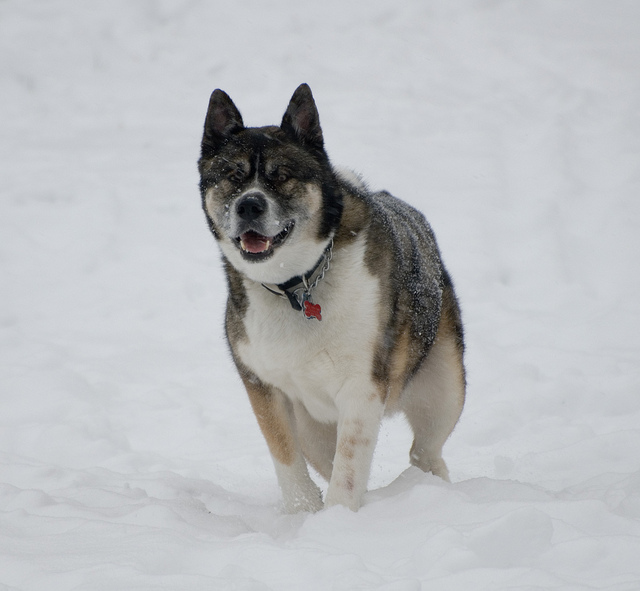

Expected class: 4 (Akia)
Predicted class: [11]


In [54]:
# TODO: Run an prediction on the endpoint
from PIL import Image
import io
import numpy as np

path = "/home/ec2-user/SageMaker/CD0387-deep-learning-topics-within-computer-vision-nlp-project-starter/dogImages/test/004.Akita/Akita_00244.jpg"

with open(path, "rb") as f:
    image = f.read()
    display(Image.open(io.BytesIO(image)))
    
    response = predictor.predict(image, initial_args={"ContentType": "image/jpeg"}) 
    prediction = np.argmax(response, 1) + 1
    print("Expected class: 4 (Akia)")
    print(f"Predicted class: {prediction}")

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()